In [2]:
import numpy as np
import pandas as pd
import json
import glob
import os.path
import http.client, urllib
from matplotlib import pyplot as plt
import time

In [2]:
box_sizes = pd.DataFrame(columns = ['File', 'Path', 'Width', 'Height', 'Category', 'File exists'])
# box_sizes.columns() = ['File', 'Path', 'Width', 'Height', 'Category', 'File exists']
box_sizes

,File,Path,Width,Height,Category,File exists


In [4]:
start_time = time.time()
# main()
for file in glob.glob('C:/Nikita/Dataset Clothing/annotations/**/*.json', recursive=True):
    try:
        with open(file, "r") as read_file:
            jsfile = json.load(read_file)
    except:
        print('Failed to read the json file, I don\'t know why')
    for arr_box in jsfile['arr_boxes']:
        
        box_sizes = box_sizes.append({'File': jsfile['file_name'][jsfile['file_name'].rfind('\\')+1:], 'Path': jsfile['file_name'], 'Width': arr_box['width'], 'Height': arr_box['height'], 'Category': arr_box['class'], 'File exists': os.path.exists('C:/Nikita/Dataset Clothing/' + jsfile['file_name'])}, ignore_index = True)

conn = http.client.HTTPSConnection("api.pushover.net:443")
conn.request("POST", "/1/messages.json",
  urllib.parse.urlencode({
    "token": "aaf695vegtzi1wxzdut3vx1xt1ke8f",
    "user": "uwwjaaxvyp289d6v7vegys83k2dz96",
    "message": "Ваше сиятельство, осмелюсь доложить: расчёты закончены!",
  }), { "Content-type": "application/x-www-form-urlencoded" })
conn.getresponse()

print("--- %s seconds ---" % (time.time() - start_time))

--- 3.0422747135162354 seconds ---


In [83]:
# box_sizes.sort_values(by = 'Smallest box dimension')
box_sizes[box_sizes['Category'] == 'suspenders']

,File,Path,Width,Height,Category,File exists
35180,dataset/bufandas/119.jpg,dataset/bufandas/119.jpg,432.693025,740.725512,suspenders,True
53688,dataset/camisas/2889.jpg,dataset/camisas/2889.jpg,422.809480,687.123497,suspenders,True
56860,dataset/camisas/4398.jpg,dataset/camisas/4398.jpg,440.358824,624.521051,suspenders,True
68585,dataset/corbatas/36.jpg,dataset/corbatas/36.jpg,374.841656,508.896797,suspenders,True
68660,dataset/corbatas/47.jpg,dataset/corbatas/47.jpg,341.449307,514.553894,suspenders,True


In [23]:
box_sizes.to_csv('C:/Nikita/Dataset Clothing/box_sizes.csv', header = True, index = True)

In [4]:
box_sizes.head()

,Unnamed: 0,Unnamed: 0.1,File,Path,Width,Height,Category,File exists
0,0,0,1.jpg,dataset/abrigos/1.jpg,762.420699,499.026160,trousers,True
1,1,1,1.jpg,dataset/abrigos/1.jpg,1229.981361,1745.170683,coats,True
2,2,2,100.jpg,dataset/abrigos/100.jpg,319.006281,224.050519,trousers,True
3,3,3,100.jpg,dataset/abrigos/100.jpg,625.771724,797.433397,jackets,True
4,4,4,1000.jpg,dataset/abrigos/1000.jpg,101.108861,111.184750,trousers,True


In [5]:
categories = box_sizes.Category.unique()
len(categories)

35

In [7]:
# box_sizes.File = box_sizes.File.astype('string')
# box_sizes.File = box_sizes.File.apply(lambda x: x[x.rfind('/')+1:])

In [11]:
os.getcwd()

'C:\\Users\\administrator\\Documents\\GitHub\\Clothes-dataset'

In [30]:
box_sizes.to_csv('C:/Nikita/Dataset Clothing/box_sizes.csv', header = True, index = True)

In [13]:
box_sizes.head()

,Unnamed: 0,Unnamed: 0.1,File,Path,Width,Height,Category,File exists
0,0,0,1.jpg,dataset/abrigos/1.jpg,762.420699,499.026160,trousers,True
1,1,1,1.jpg,dataset/abrigos/1.jpg,1229.981361,1745.170683,coats,True
2,2,2,100.jpg,dataset/abrigos/100.jpg,319.006281,224.050519,trousers,True
3,3,3,100.jpg,dataset/abrigos/100.jpg,625.771724,797.433397,jackets,True
4,4,4,1000.jpg,dataset/abrigos/1000.jpg,101.108861,111.184750,trousers,True


In [12]:
box_sizes['File exists'].unique()

array([ True])

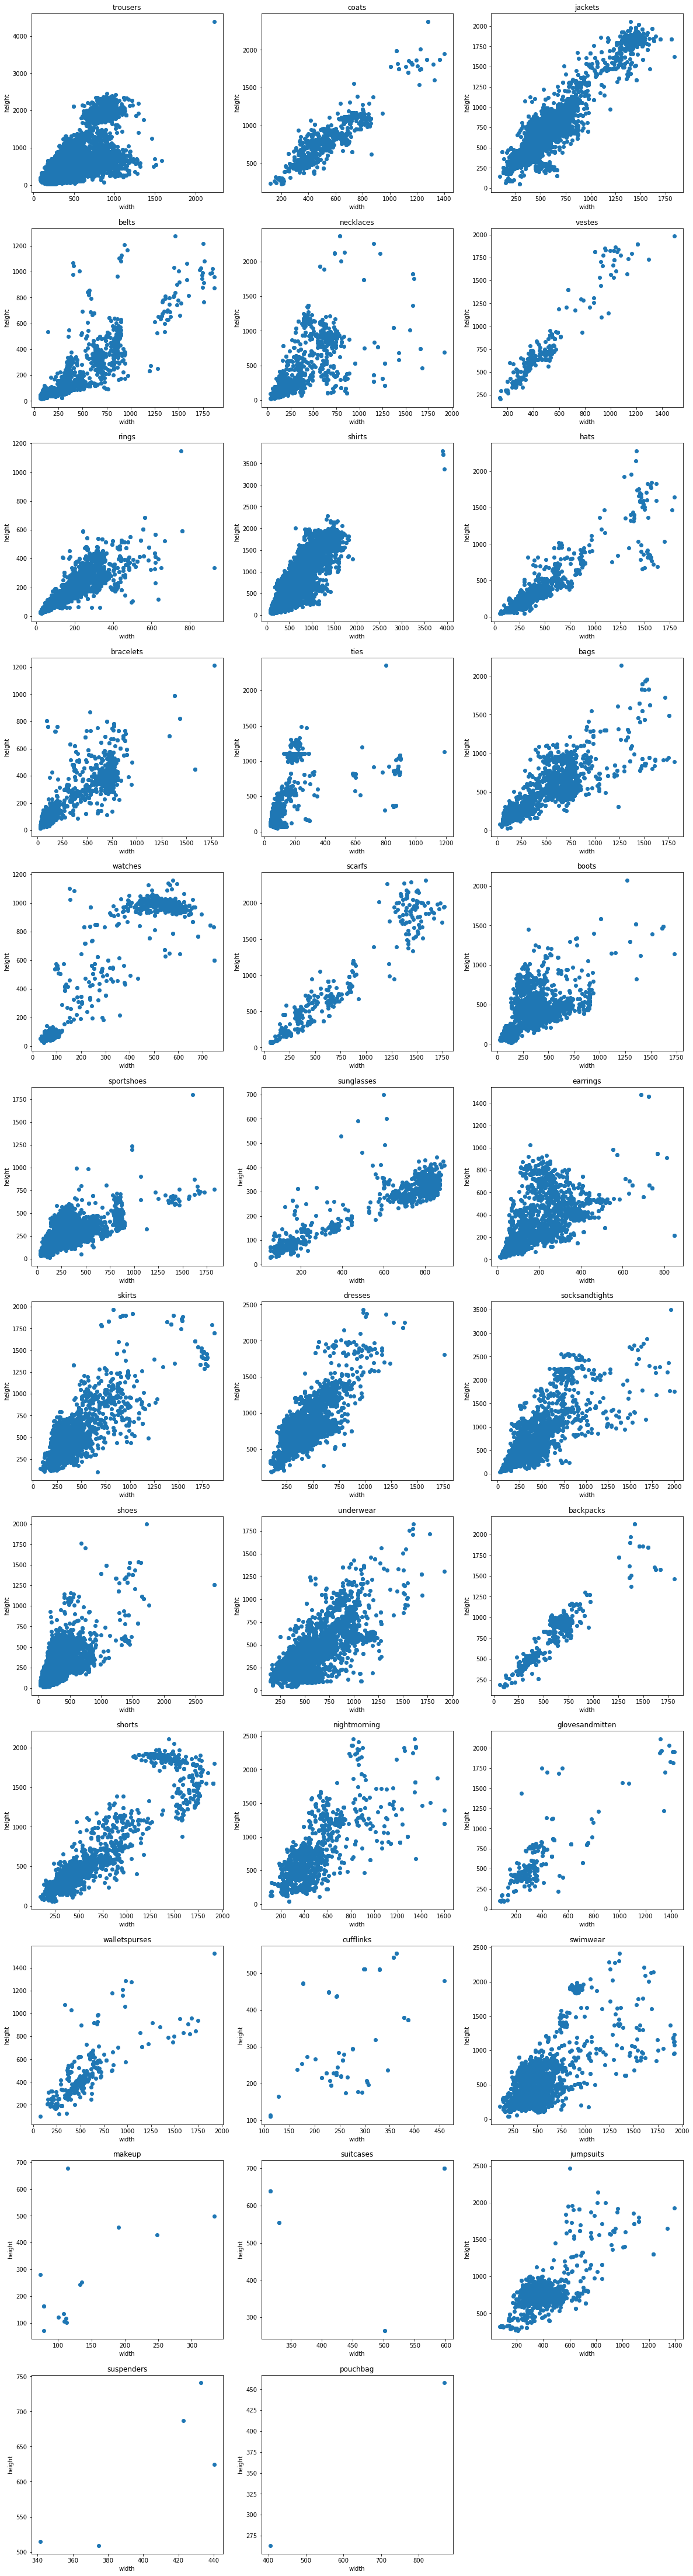

In [82]:
plt.figure(figsize = (20, 80))

plot_number = 0
for category in categories:
    plot_number += 1
    plt.subplot(12, 3, plot_number)
    plt.scatter(box_sizes[box_sizes['Category'] == category]['Width'], box_sizes[box_sizes['Category'] == category]['Height'])
    plt.title(category)
    plt.xlabel('width')
    plt.ylabel('height')